Download the dataset from https://www.kaggle.com/competitions/playground-series-s4e1/data?select=train.csv

In [88]:
import os
import subprocess

# File name
file_name = "train.csv"
url = "https://owncloud.ut.ee/owncloud/s/4gX2Fd2enyyZLmW/download/train.csv"

# Check if the file exists
if os.path.exists(file_name):
    print(f"{file_name} already exists. Skipping download.")
else:
    print(f"{file_name} not found. Downloading...")
    subprocess.run(["wget", "-O", file_name, url], check=True)
    print("Download completed.")


train.csv already exists. Skipping download.


In [89]:
import pandas as pd
import numpy as np

df_train = pd.read_csv("train.csv")

df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [90]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [91]:
df_train = df_train.drop(columns=['id', 'CustomerId', 'Surname'])

In [92]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [93]:
na_info = df_train.isna().sum()

# Display columns that contain NaN values
na_columns = na_info[na_info > 0]
print(na_columns)

Series([], dtype: int64)


In [94]:

# Initialize a dictionary to store label encoders
label_encoders = {}

for column in df_train.columns:
    if df_train[column].dtype == 'object':
        le = LabelEncoder()
        df_train[column] = le.fit_transform(df_train[column])
        label_encoders[column] = le  # Save the label encoder


In [95]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [96]:

X = df_train.drop(['Exited'], axis=1)  # This excludes 'current_status'
y = df_train['Exited']  # The target variable

# Now split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,  # Target variable
    test_size=0.3,
    random_state=0
)



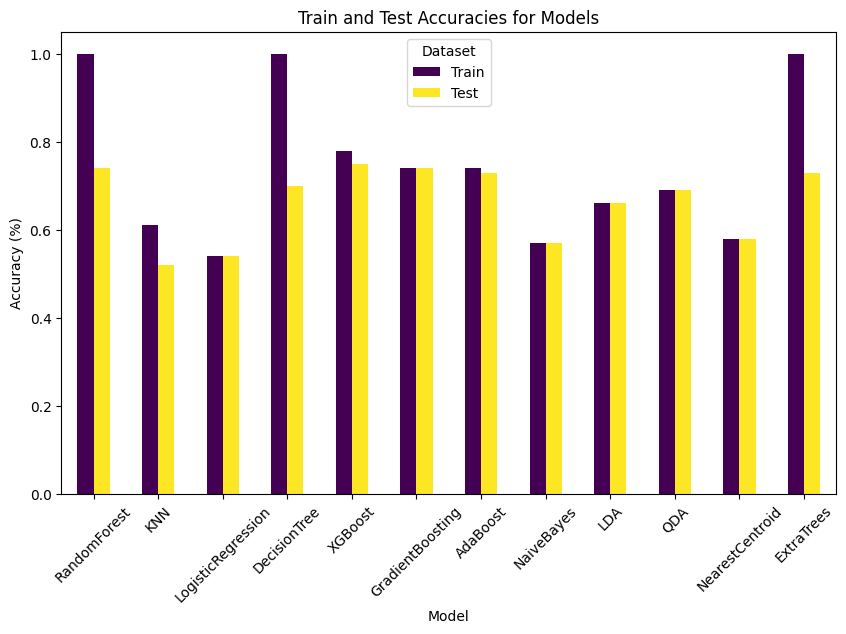

In [97]:
# Dictionary of model classes as defined previously
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


models = {
    'RandomForest': RandomForestClassifier,
    'KNN': KNeighborsClassifier,
    'LogisticRegression': LogisticRegression,
    'DecisionTree': DecisionTreeClassifier,
    'XGBoost': XGBClassifier,
    'GradientBoosting': GradientBoostingClassifier,
    'AdaBoost': AdaBoostClassifier,
    'NaiveBayes': GaussianNB,
    'LDA': LinearDiscriminantAnalysis,
    'QDA': QuadraticDiscriminantAnalysis,
    'NearestCentroid': NearestCentroid,
    'ExtraTrees': ExtraTreesClassifier
}

# Dictionary to store accuracies
accuracies = {'Train': {}, 'Test': {}}
precisions = {'Train': {}, 'Test': {}}

# Loop through each model
for model_name, model_class in models.items():
    # Instantiate the model
    # if model_name == 'XGBoost':
    #     model = model_class(use_label_encoder=False, eval_metric='logloss', random_state=0)
    # else:
    model = model_class()

    # Fit the model
    model.fit(X_train, y_train)

    # Evaluate on Test data
    y_pred_test = model.predict(X_test)
    acc_test = roc_auc_score(y_test, y_pred_test) 
    accuracies['Test'][model_name] = round(acc_test, 2)
    cm_test = confusion_matrix(y_test, y_pred_test)

    # Evaluate on Train data
    y_pred_train = model.predict(X_train)
    acc_train = roc_auc_score(y_train, y_pred_train) 
    accuracies['Train'][model_name] = round(acc_train, 2)
    cm_train = confusion_matrix(y_train, y_pred_train)

    # Calculate False Negative (Predicted False while Real is True) for precision analysis
    precisions['Train'][model_name] = cm_train[0][1]
    precisions['Test'][model_name] = cm_test[0][1]

    # Plot Confusion Matrix for Test Data
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(pd.DataFrame(cm_test, index=np.unique(y_test), columns=np.unique(y_test)),
    #             annot=True, fmt='g', cmap='Blues')
    # plt.title(f'{model_name} - Test Confusion Matrix')
    # plt.xlabel('Predicted')
    # plt.ylabel('Actual')
    # plt.show()

# Plotting Model Accuracies
accuracy_df = pd.DataFrame(accuracies)
accuracy_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Train and Test Accuracies for Models')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.show()

# # Plotting False Negative Metrics
# precision_df = pd.DataFrame(precisions)
# precision_df.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
# plt.title('False Negative Counts (Predicted False while Real is True)')
# plt.xlabel('Model')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.legend(title='Dataset')
# plt.show()



In [98]:
print("Best Model",max(accuracies['Test']), " with AUC score ",accuracies['Test'][max(accuracies['Test'])])
baseline=models[max(accuracies['Test'])]()

Best Model XGBoost  with AUC score  0.75


In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from hyperopt import STATUS_OK

In [146]:
import numpy as np
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Define feature selection techniques
feature_selection_options = [
    None,
    {'type': 'variance_threshold', 'params': {'threshold': hp.uniform('var_threshold', 0.0, 0.2)}},
    {'type': 'select_k_best', 'params': {'k': hp.choice('k_best_k', range(5, 10))}}
]

# Define preprocessor options
preprocessor_options = [
    None,
    {'type': 'standard_scaler', 'params': {}},
    {'type': 'minmax_scaler', 'params': {}},
    {'type': 'pca', 'params': {'n_components': hp.choice('pca_n_components', range(5, 9))}},
    {'type': 'polynomial_features', 'params': {'degree': hp.choice('poly_degree', range(2, 4))}},
    {'type': 'kernel_pca', 'params': {
        'n_components': hp.choice('kernel_pca_n_components', range(5, 9)),
        'kernel': hp.choice('kernel_pca_kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    }}
]


# Define search space for models
search_spaces = {
    #     'RandomForest': {
    #     'preprocessor': hp.choice('preprocessor', preprocessor_options),
    #     'n_estimators': hp.choice('n_estimators', range(50, 301, 50)),
    #     'max_depth': hp.choice('max_depth', range(5, 20)),
    #     'criterion': hp.choice('criterion', ['gini', 'entropy']),
    #     'min_samples_split': hp.choice('min_samples_split', range(2, 10)),
    #     'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 5)),
    #     'class_weight': hp.choice('class_weight', [None, 'balanced', 'balanced_subsample']),
    #     'random_state': 0
    # },
    # 'KNN': {
    #     'feature_selection': hp.choice('feature_selection', feature_selection_options),
    #     'preprocessor': hp.choice('preprocessor', preprocessor_options),
    #     'n_neighbors': hp.choice('n_neighbors', range(3, 20)),
    #     'weights': hp.choice('weights', ['uniform', 'distance']),
    #     'metric': hp.choice('metric', ['euclidean', 'manhattan', 'chebyshev', 'minkowski']),
    #     'leaf_size': hp.choice('leaf_size', range(10, 50))
    # },
    # 'LogisticRegression': {
    #     'feature_selection': hp.choice('feature_selection', feature_selection_options),
    #     'preprocessor': hp.choice('preprocessor', preprocessor_options),
    #     'C': hp.loguniform('C', np.log(0.001), np.log(100)),
    #     'penalty': hp.choice('penalty', ['l1', 'l2']),
    #     'solver': hp.choice('solver', ['liblinear', 'saga']),
    #     'dual': hp.choice('dual', [True, False]),
    #     'random_state': 0
    # },
    'XGBoost': {
        'feature_selection': hp.choice('feature_selection', feature_selection_options),
        'preprocessor': hp.choice('preprocessor', preprocessor_options),
        'max_depth': hp.choice('max_depth', range(3, 10)),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),
        'n_estimators': hp.choice('n_estimators', range(50, 300, 50)),
        'subsample': hp.uniform('subsample', 0.5, 1),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
        'gamma': hp.uniform('gamma', 0, 5),
        'alpha': hp.loguniform('alpha', np.log(0.01), np.log(10)),
        'lambda': hp.loguniform('lambda', np.log(0.01), np.log(10)),
        'scale_pos_weight': hp.uniform('scale_pos_weight', 0.5, 5),
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'random_state': 0
    },
}

best_auc=0
auto_model=None
def objective(params, model_name, X_train, y_train, X_test, y_test, scoring='roc_auc'):
    # Get model class
    model_class = models[model_name]
    feature_selection_config = params.pop('feature_selection', None)
    preprocessor_config = params.pop('preprocessor', None)
    global best_auc
    global auto_model

    
    # Build pipeline
    steps = []
    
    # Add feature selection
    if feature_selection_config:
        if feature_selection_config['type'] == 'variance_threshold':
            steps.append(('feature_selection', VarianceThreshold(threshold=feature_selection_config['params']['threshold'])))
        elif feature_selection_config['type'] == 'select_k_best':
            steps.append(('feature_selection', SelectKBest(score_func=mutual_info_classif, k=feature_selection_config['params']['k'])))
    
    # Add preprocessor
    if preprocessor_config:
        if preprocessor_config['type'] == 'standard_scaler':
            steps.append(('scaler', StandardScaler()))
        elif preprocessor_config['type'] == 'minmax_scaler':
            steps.append(('scaler', MinMaxScaler()))
        elif preprocessor_config['type'] == 'pca':
            steps.append(('pca', PCA(n_components=preprocessor_config['params']['n_components'])))
        elif preprocessor_config['type'] == 'polynomial_features':
            steps.append(('poly', PolynomialFeatures(degree=preprocessor_config['params']['degree'])))
        elif preprocessor_config['type'] == 'kernel_pca':
            steps.append(('kernel_pca', KernelPCA(
                n_components=preprocessor_config['params']['n_components'],
                kernel=preprocessor_config['params']['kernel']
            )))
    
    # Add model to the pipeline
    steps.append(('model', model_class(**params)))
    pipeline = Pipeline(steps)
    
    # Train model and predict
    try:
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        
        # Calculate score
        if scoring == 'accuracy':
            score = accuracy_score(y_test, y_pred)
        elif scoring == 'f1':
            score = f1_score(y_test, y_pred)
        elif scoring == 'roc_auc':
            score = roc_auc_score(y_test, y_pred)
            if score>best_auc:
                best_auc=score
                auto_model=pipeline
        else:
            score = accuracy_score(y_test, y_pred)
    except Exception as e:
        # print(f"Error: {e}")
        return {'loss': float('inf'), 'status': STATUS_OK}
    
    return {'loss': -score, 'status': STATUS_OK}

best_params = {}

# Run hyperopt
for model_name in search_spaces.keys():
    print(f"Tuning {model_name}...")
    
    trials = Trials()
    best = fmin(
        fn=lambda params: objective(params, model_name, X_train, y_train, X_test, y_test),
        space=search_spaces[model_name],
        algo=tpe.suggest,
        max_evals=20,
        trials=trials
    )
    
    best_params[model_name] = best
    print(f"Best parameters for {model_name}: {best}")

print("\n== Best Parameters ==")
for model, params in best_params.items():
    print(f"{model}: {params}")


Tuning XGBoost...
Error: Unable to allocate 99.4 GiB for an array with shape (115523, 115523) and data type float64
Error: Unable to allocate 99.4 GiB for an array with shape (115523, 115523) and data type float64
Error: Unable to allocate 99.4 GiB for an array with shape (115523, 115523) and data type float64
100%|██████████| 20/20 [00:40<00:00,  2.01s/trial, best loss: -0.8068045031184383]
Best parameters for XGBoost: {'alpha': 4.984950913898355, 'colsample_bytree': 0.5274043743325572, 'feature_selection': 1, 'gamma': 4.527877369119358, 'lambda': 0.056041064193713824, 'learning_rate': 0.25657007564707807, 'max_depth': 0, 'n_estimators': 1, 'preprocessor': 1, 'scale_pos_weight': 3.84930186015682, 'subsample': 0.8436227703752676, 'var_threshold': 0.17617985708426054}

== Best Parameters ==
XGBoost: {'alpha': 4.984950913898355, 'colsample_bytree': 0.5274043743325572, 'feature_selection': 1, 'gamma': 4.527877369119358, 'lambda': 0.056041064193713824, 'learning_rate': 0.25657007564707807,

In [147]:
auto_model

Pipeline(steps=[('feature_selection',
                 VarianceThreshold(threshold=0.17617985708426054)),
                ('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(alpha=4.984950913898355, base_score=None,
                               booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.5274043743325572, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               lambda=0.056041064193713824,
                               learning_rate=0.25657007564707807, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_dept

In [157]:
import numpy as np
from scipy.stats import chi2

import matplotlib.pyplot as plt

# Step 1: Fit the models
auto_model.fit(X_train, y_train)
baseline.fit(X_train, y_train)

# Step 2: Generate predictions
y_pred_auto = auto_model.predict(X_test)
y_pred_baseline = baseline.predict(X_test)

print("AutoML AUC: ", roc_auc_score(y_test, y_pred_auto))
print("Baseline AUC: ", roc_auc_score(y_test, y_pred_baseline))

# Step 3: Analyze thresholds (adjust if needed)
threshold = 0.7  # Default threshold
y_pred_auto_adjusted = (auto_model.predict_proba(X_test)[:, 1] >= threshold).astype(int)
y_pred_baseline_adjusted = (baseline.predict_proba(X_test)[:, 1] >= threshold).astype(int)


# Step 5: Create contingency table
y_test = np.array(y_test)  # Ensure it's a NumPy array
both_correct = np.sum((y_pred_auto_adjusted == y_test) & (y_pred_baseline_adjusted == y_test))
auto_correct_only = np.sum((y_pred_auto == y_test) & (y_pred_baseline_adjusted != y_test))
baseline_correct_only = np.sum((y_pred_auto_adjusted != y_test) & (y_pred_baseline_adjusted == y_test))
both_incorrect = np.sum((y_pred_auto_adjusted != y_test) & (y_pred_baseline_adjusted != y_test))

contingency_table = [[both_correct, auto_correct_only],
                     [baseline_correct_only, both_incorrect]]

# Step 6: McNemar's test calculation
b = auto_correct_only
c = baseline_correct_only

# McNemar's test statistic
chi2_stat = (b - c)**2 / (b + c) if (b + c) > 0 else 0

# P-value using chi-squared distribution (df=1)
p_value = 1 - chi2.cdf(chi2_stat, df=1)

# Step 7: Interpret the result
print("Contingency Table:")
print(f"[[{both_correct}, {auto_correct_only}],")
print(f" [{baseline_correct_only}, {both_incorrect}]]")
print("Test Statistic:", chi2_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Significant difference between models (reject null hypothesis).")
else:
    print("No significant difference between models (fail to reject null hypothesis)")



AutoML AUC:  0.8068045031184383
Baseline AUC:  0.7513030081832988
Contingency Table:
[[39870, 4355],
 [2440, 4536]]
Test Statistic: 539.6946284032376
p-value: 0.0
Significant difference between models (reject null hypothesis).
